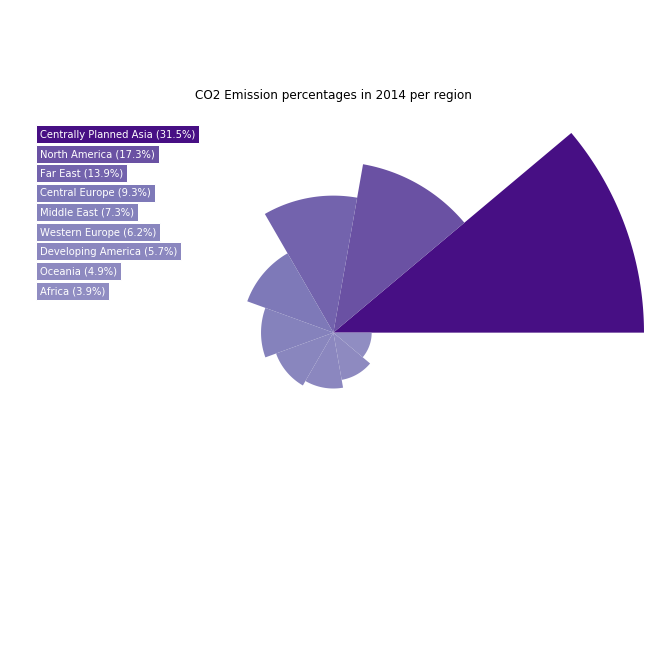

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

url = 'https://raw.githubusercontent.com/dirkkoolmees/CO2_emissions_per-region/master/CO2%20Emissions%20per%20region%20-%20Sheet2.csv'
df = pd.read_csv(url, index_col = 'Year')

#select year 2014
df_2014 = df.query('Year == [2014]')

#create new dataframe with column giving the total for 2014 per region
df_2014_s = pd.DataFrame(df_2014.sum(numeric_only=True).rename('Emissions 2014'))

#Sort the values high to low
df_2014_s.sort_values('Emissions 2014', ascending = False, inplace = True)

#Calculate the grand total
total_2014 = df.loc[2014].sum()

#Determine the position of the bars on the x-axis. All values need to be spread out between 0 and 2pi.
#theta = 2*np.pi*(df_2014_s['Emissions 2014'].cumsum()/total_2014) - incorrect idea
N = len(df_2014_s)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False) + np.pi/N

#Determine the width of the bar.
#width = 2*np.pi*(df_2014_s['Emissions 2014']/total_2014) - incorrect idea
width = 2*np.pi/N

#Determine the radius. This is done using the area formula for a circle sector. The area of the wedge corresponds
#with the percentage emissions of the region out of the total
radii = (df_2014_s['Emissions 2014']/total_2014)/width

df_percentage = pd.DataFrame(df_2014_s['Emissions 2014']/total_2014)
df_radii = pd.DataFrame(radii) #creating a dataframe from the radii to be used for the annotations and colormap

#creating an array of colors in a loop so that the color is linked to the emission %
cmp_array = np.empty((0,4))
for i in range(0, N):
    rad = 0.5 + df_radii.iloc[i, 0] #gets the radius of the wedge, plus 0.5 to make it darker
    color = plt.cm.Purples(rad) #gets the color associated with that radius
    cmp_array = np.append(cmp_array, [color], axis=0)

#plotting a bar graph based on theta, radii and width which is then projected on a polar grid. The grid is removed.  
fig = plt.figure(figsize = (10, 6))
ax = plt.subplot(111,  projection='polar', frameon = False)
ax.bar(theta, radii, width=width, bottom=0.0, color=cmp_array)

#Because the polar projection decreases the width of the figure I will increase the size and change the position of the axes
ax.set_aspect(aspect = 'equal', adjustable = 'box')
l, b, w, h = ax.get_position().bounds
ax.set_position (pos = [l-0.2, b-0.7, 2*w, 2*h], which = 'both')

#Remove tick labels and grid
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.xaxis.grid(False)
ax.yaxis.grid(False)

#Create a colored legend using a loop
ytext = 0.8 #initial y position for text
for i in range(0, N):
    regions = df_2014_s.index[i]
    percentage = "{:.1%}".format(df_percentage.iloc[i, 0])
    label = str(regions) + ' (' + str(percentage) + ')'
    rad = 0.5 + df_radii.iloc[i, 0] #gets the radius of the wedge, plus 0.5 to make the colors darker
    color = plt.cm.Purples(rad) #gets the color associated with that radius
    ax.text(0.05, ytext, label, transform=ax.transAxes, horizontalalignment='left',c='w',
             bbox=dict(fc=color,ec='w', boxstyle="square,pad=0.4"))
    ytext = ytext - 0.03
    
ax.set_title('CO2 Emission percentages in 2014 per region', x=0.5, y=0.85);

file_path = r'C:\Users\dirkk\Google Drive\Data_Visualization_Files\Images for the course\Module 2\Python Instructions\CO2_pie_2.png'

plt.savefig(file_path);
    